# World military powers clustering

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:20,.2f}'.format) # Nicer way to print floats

# Helper function to show the null values of a given dataframe.
# Only shows null value counts for columns with non-zero null values.
# Can be configured to show percentages instead of counts.
def nulls(df, percentage=False):
    vals = df.isnull().sum()[df.isnull().sum() > 0]
    if percentage:
        return vals * 100 / len(df)
    return vals

In [2]:
# header=1 makes the column names appropriate
# thousands=',' tells pandas to parse commas as a thousand separator. Helps when convertin to float.
df = pd.read_excel('military.xlsx', header=1, thousands=',')

In [3]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.34,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0.00,Afghanistan,0.00,Afghanistan,0.00,Afghanistan,0.00,Afghanistan,0.00,Afghanistan,12000000000,Afghanistan,2840000000,Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,14325743,Afghanistan,34940837,Afghanistan,652230,Afghanistan,0.00,Afghanistan,1200,Afghanistan,"5,987.00"
1,Albania,2.31,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38.00,Albania,0.00,Albania,0.00,Albania,0.00,Albania,0.00,Albania,250000000,Albania,9505000000,Albania,4,Albania,16000,Albania,42500,Albania,168300000,Albania,1519438,Albania,3057220,Albania,28748,Albania,362.00,Albania,41,Albania,691.00
2,Algeria,0.47,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201.00,Algeria,0.00,Algeria,6.00,Algeria,0.00,Algeria,5.00,Algeria,13000000000,Algeria,6260000000,Algeria,157,Algeria,1306000,Algeria,325000,Algeria,12200000000,Algeria,20741263,Algeria,41657488,Algeria,2381741,Algeria,998.00,Algeria,0,Algeria,"6,734.00"
3,Angola,0.84,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57.00,Angola,0.00,Angola,0.00,Angola,0.00,Angola,0.00,Angola,7000000000,Angola,42080000000,Angola,176,Angola,1666000,Angola,82300,Angola,8273000000,Angola,6244205,Angola,30355880,Angola,1246700,Angola,"1,600.00",Angola,1300,Angola,"5,369.00"
4,Argentina,0.65,Argentina,227,Argentina,24,Argentina,7,Argentina,9,Argentina,64,Argentina,100,Argentina,0,Argentina,370,Argentina,739,Argentina,83,Argentina,172,Argentina,26,Argentina,49.00,Argentina,0.00,Argentina,2.00,Argentina,4.00,Argentina,0.00,Argentina,4200000000,Argentina,214900000000,Argentina,1138,Argentina,479400,Argentina,685000,Argentina,2185000000,Argentina,20179430,Argentina,44694198,Argentina,2780400,Argentina,"4,989.00",Argentina,11000,Argentina,"11,968.00"


The table currently shows the country name before the associated value for each column. Like 'Military Strength' and 'Military Strength Power Index'. We do not need all these columns that show the country name, we only need one column for that. We will drop all these duplicate columns, all but one of them, and then rename the remaining one as 'Country'.

In [4]:
df = df.T.drop_duplicates().T
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.34,260,0,25,30,0,187,0,0,1062,0,176,50,Afghanistan,0.00,Afghanistan,0.00,0.00,0.00,0.00,12000000000,2840000000,43,0,5500,0,14325743,34940837,652230,Afghanistan,0.00,1200,Afghanistan,"5,987.00"
1,Albania,2.31,19,0,0,0,0,19,0,0,467,0,0,0,Albania,38.00,Albania,0.00,0.00,0.00,0.00,250000000,9505000000,4,16000,42500,168300000,1519438,3057220,28748,Albania,362.00,41,Albania,691.00
2,Algeria,0.47,551,103,22,59,87,257,45,880,7361,320,240,316,Algeria,201.00,Algeria,0.00,6.00,0.00,5.00,13000000000,6260000000,157,1306000,325000,12200000000,20741263,41657488,2381741,Algeria,998.00,0,Algeria,"6,734.00"
3,Angola,0.84,295,72,18,30,47,126,15,379,595,28,357,115,Angola,57.00,Angola,0.00,0.00,0.00,0.00,7000000000,42080000000,176,1666000,82300,8273000000,6244205,30355880,1246700,Angola,"1,600.00",1300,Angola,"5,369.00"
4,Argentina,0.65,227,24,7,9,64,100,0,370,739,83,172,26,Argentina,49.00,Argentina,0.00,2.00,4.00,0.00,4200000000,214900000000,1138,479400,685000,2185000000,20179430,44694198,2780400,Argentina,"4,989.00",11000,Argentina,"11,968.00"


The above code looks weird. I could not find how to directly remove columns with all duplicated values. But there is the drop_duplicates() function that removes all the duplicated rows and keeps the first one. So I took the transpose of the dataframe, called drop_duplicates() on it and then took the transpose again to get the table back to the original shape. It worked, but the problem this time is that some of the columns we wanted to remove had 'NaN' values and as such pandas did not count them as duplicated and it did not drop them. These columns are:

- Navy Fleet Strengths
- Aircraft Carrier Fleet Strength
- Total Coastline Coverage
- Total Border Coverage

Since there aren't that many, we can just drop these columns by hand.

In [5]:
to_drop = ['Navy Fleet Strengths', 'Aircraft Carrier Fleet Strength', 'Total Coastline Coverage', 'Total Border Coverage']
df.drop(to_drop, axis=1, inplace=True)

And now to rename the 'Country' column

In [6]:
df.rename(columns={ 'Military Strength': 'Country' }, inplace=True)

In [7]:
df.head()

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.34,260,0,25,30,0,187,0,0,1062,0,176,50,0.00,0.00,0.00,0.00,0.00,12000000000,2840000000,43,0,5500,0,14325743,34940837,652230,0.00,1200,"5,987.00"
1,Albania,2.31,19,0,0,0,0,19,0,0,467,0,0,0,38.00,0.00,0.00,0.00,0.00,250000000,9505000000,4,16000,42500,168300000,1519438,3057220,28748,362.00,41,691.00
2,Algeria,0.47,551,103,22,59,87,257,45,880,7361,320,240,316,201.00,0.00,6.00,0.00,5.00,13000000000,6260000000,157,1306000,325000,12200000000,20741263,41657488,2381741,998.00,0,"6,734.00"
3,Angola,0.84,295,72,18,30,47,126,15,379,595,28,357,115,57.00,0.00,0.00,0.00,0.00,7000000000,42080000000,176,1666000,82300,8273000000,6244205,30355880,1246700,"1,600.00",1300,"5,369.00"
4,Argentina,0.65,227,24,7,9,64,100,0,370,739,83,172,26,49.00,0.00,2.00,4.00,0.00,4200000000,214900000000,1138,479400,685000,2185000000,20179430,44694198,2780400,"4,989.00",11000,"11,968.00"


The table is now in a shape we can work with. We will save it into a csv file. It could be useful in the future.

In [8]:
df.to_csv('militarypowers.csv', index=False)

## EDA

In [9]:
df.shape

(138, 31)

In [10]:
nulls(df)

Navy Fleet Strengths value               14
Aircraft Carrier Fleet Strength value    23
Submarine Fleet Strength value           23
Destroyer Fleet Strength value           23
Frigate Fleet Strength value             23
Total Coastline Coverage value           29
Total Border Coverage value               9
dtype: int64

In [11]:
nulls(df, percentage=True)

Navy Fleet Strengths value                             10.14
Aircraft Carrier Fleet Strength value                  16.67
Submarine Fleet Strength value                         16.67
Destroyer Fleet Strength value                         16.67
Frigate Fleet Strength value                           16.67
Total Coastline Coverage value                         21.01
Total Border Coverage value                             6.52
dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Country                                  138 non-null    object
 1   Military Strength Power Index            138 non-null    object
 2   Aircraft Strength value                  138 non-null    object
 3   Fighter/Interceptor Strength value       138 non-null    object
 4   Attack Aircraft Strength value           138 non-null    object
 5   Transport Aircraft Fleet Strength value  138 non-null    object
 6   Trainer Aircraft Fleet value             138 non-null    object
 7   Helicopter Fleet Strength value          138 non-null    object
 8   Attack Helicopter Fleet Strength value   138 non-null    object
 9   Tank Strength value                      138 non-null    object
 10  AFV/APC Strength value                   138 non-null    objec

All these columns are objects, we need to conver them info floats. We will convert all these columns, except the country names of course, into float. Some columns have numbers that use a comma for better readability. We will remove thsese as pandas cannot parse strings with commas between digits.

In [13]:
df.head()

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.34,260,0,25,30,0,187,0,0,1062,0,176,50,0.00,0.00,0.00,0.00,0.00,12000000000,2840000000,43,0,5500,0,14325743,34940837,652230,0.00,1200,"5,987.00"
1,Albania,2.31,19,0,0,0,0,19,0,0,467,0,0,0,38.00,0.00,0.00,0.00,0.00,250000000,9505000000,4,16000,42500,168300000,1519438,3057220,28748,362.00,41,691.00
2,Algeria,0.47,551,103,22,59,87,257,45,880,7361,320,240,316,201.00,0.00,6.00,0.00,5.00,13000000000,6260000000,157,1306000,325000,12200000000,20741263,41657488,2381741,998.00,0,"6,734.00"
3,Angola,0.84,295,72,18,30,47,126,15,379,595,28,357,115,57.00,0.00,0.00,0.00,0.00,7000000000,42080000000,176,1666000,82300,8273000000,6244205,30355880,1246700,"1,600.00",1300,"5,369.00"
4,Argentina,0.65,227,24,7,9,64,100,0,370,739,83,172,26,49.00,0.00,2.00,4.00,0.00,4200000000,214900000000,1138,479400,685000,2185000000,20179430,44694198,2780400,"4,989.00",11000,"11,968.00"


In [14]:
# errors='ignore' will be removed in later pandas.
df = df.apply(pd.to_numeric, errors='ignore')

In [15]:
df.head()

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.34,260,0,25,30,0,187,0,0,1062,0,176,50,0.00,0.00,0.00,0.00,0.00,12000000000,2840000000,43,0,5500,0,14325743,34940837,652230,0.00,1200,"5,987.00"
1,Albania,2.31,19,0,0,0,0,19,0,0,467,0,0,0,38.00,0.00,0.00,0.00,0.00,250000000,9505000000,4,16000,42500,168300000,1519438,3057220,28748,362.00,41,691.00
2,Algeria,0.47,551,103,22,59,87,257,45,880,7361,320,240,316,201.00,0.00,6.00,0.00,5.00,13000000000,6260000000,157,1306000,325000,12200000000,20741263,41657488,2381741,998.00,0,"6,734.00"
3,Angola,0.84,295,72,18,30,47,126,15,379,595,28,357,115,57.00,0.00,0.00,0.00,0.00,7000000000,42080000000,176,1666000,82300,8273000000,6244205,30355880,1246700,"1,600.00",1300,"5,369.00"
4,Argentina,0.65,227,24,7,9,64,100,0,370,739,83,172,26,49.00,0.00,2.00,4.00,0.00,4200000000,214900000000,1138,479400,685000,2185000000,20179430,44694198,2780400,"4,989.00",11000,"11,968.00"


In [16]:
df.describe()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
count,138.00,138.00,138.00,138.00,138.00,138.00,138.00,138.00,138.00,138.00,138.00,138.00,138.00,124.00,115.00,115.00,115.00,115.00,138.00,138.00,138.00,138.00,138.00,138.00,138.00,138.00,138.00,109.00,138.00,129.00
mean,1.46,388.47,81.57,25.76,30.23,82.83,154.07,25.62,646.57,"2,485.70",212.16,393.98,156.93,84.98,0.38,4.80,2.05,3.52,"13,993,631,641.21","519,498,263,043.48",290.04,"585,552.36","702,018.70","11,944,118,420.29","25,442,969.93","53,180,584.65","954,674.61","6,171.33","5,464.13","3,964.22"
std,1.32,"1,231.98",230.32,94.53,92.33,240.80,520.18,97.33,"1,515.46","5,410.55",688.03,805.78,484.38,146.11,1.97,13.71,10.00,6.48,"67,311,892,724.13","1,847,251,527,661.88","1,212.97","1,667,138.90","2,168,810.06","42,750,903,273.13","84,506,975.28","165,108,987.40","2,225,570.51","20,759.01","16,494.53","3,760.10"
min,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"13,000,000.00","539,400,000.00",2.00,0.00,"2,000.00",0.00,"132,740.00","597,927.00",697.00,0.00,0.00,29.00
25%,0.57,33.00,0.00,0.00,3.00,4.25,15.25,0.00,19.25,250.25,0.00,24.25,0.00,10.00,0.00,0.00,0.00,0.00,"325,500,000.00","9,361,500,000.00",33.50,0.00,"32,500.00",0.00,"2,618,384.50","5,819,450.50","84,553.25",443.00,0.00,"1,587.00"
50%,1.03,111.00,17.00,0.00,9.00,26.00,44.00,2.00,153.00,734.50,23.00,108.00,24.00,38.00,0.00,0.00,0.00,0.00,"2,100,908,787.50","39,970,000,000.00",68.00,"13,130.00","133,500.00","80,285,000.00","5,986,089.00","16,139,097.50","305,420.00","1,566.00",875.00,"2,816.00"
75%,2.02,290.25,60.50,15.75,26.00,79.25,126.75,17.75,436.25,"2,000.00",97.25,296.50,99.75,77.75,0.00,4.00,0.00,5.50,"6,957,750,000.00","183,025,000,000.00",150.75,"222,860.00","348,750.00","2,001,500,000.00","17,567,075.00","40,688,865.75","792,961.75","3,444.00","3,050.00","5,267.00"
max,10.17,"13,264.00","2,085.00",742.00,945.00,"2,643.00","5,768.00",967.00,"12,950.00","39,253.00","6,083.00","4,465.00","3,860.00",984.00,20.00,83.00,91.00,52.00,"750,000,000,000.00","17,910,000,000,000.00","13,513.00","10,580,000.00","20,000,000.00","300,900,000,000.00","752,855,402.00","1,384,688,986.00","17,098,242.00","202,080.00","110,000.00","22,457.00"


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

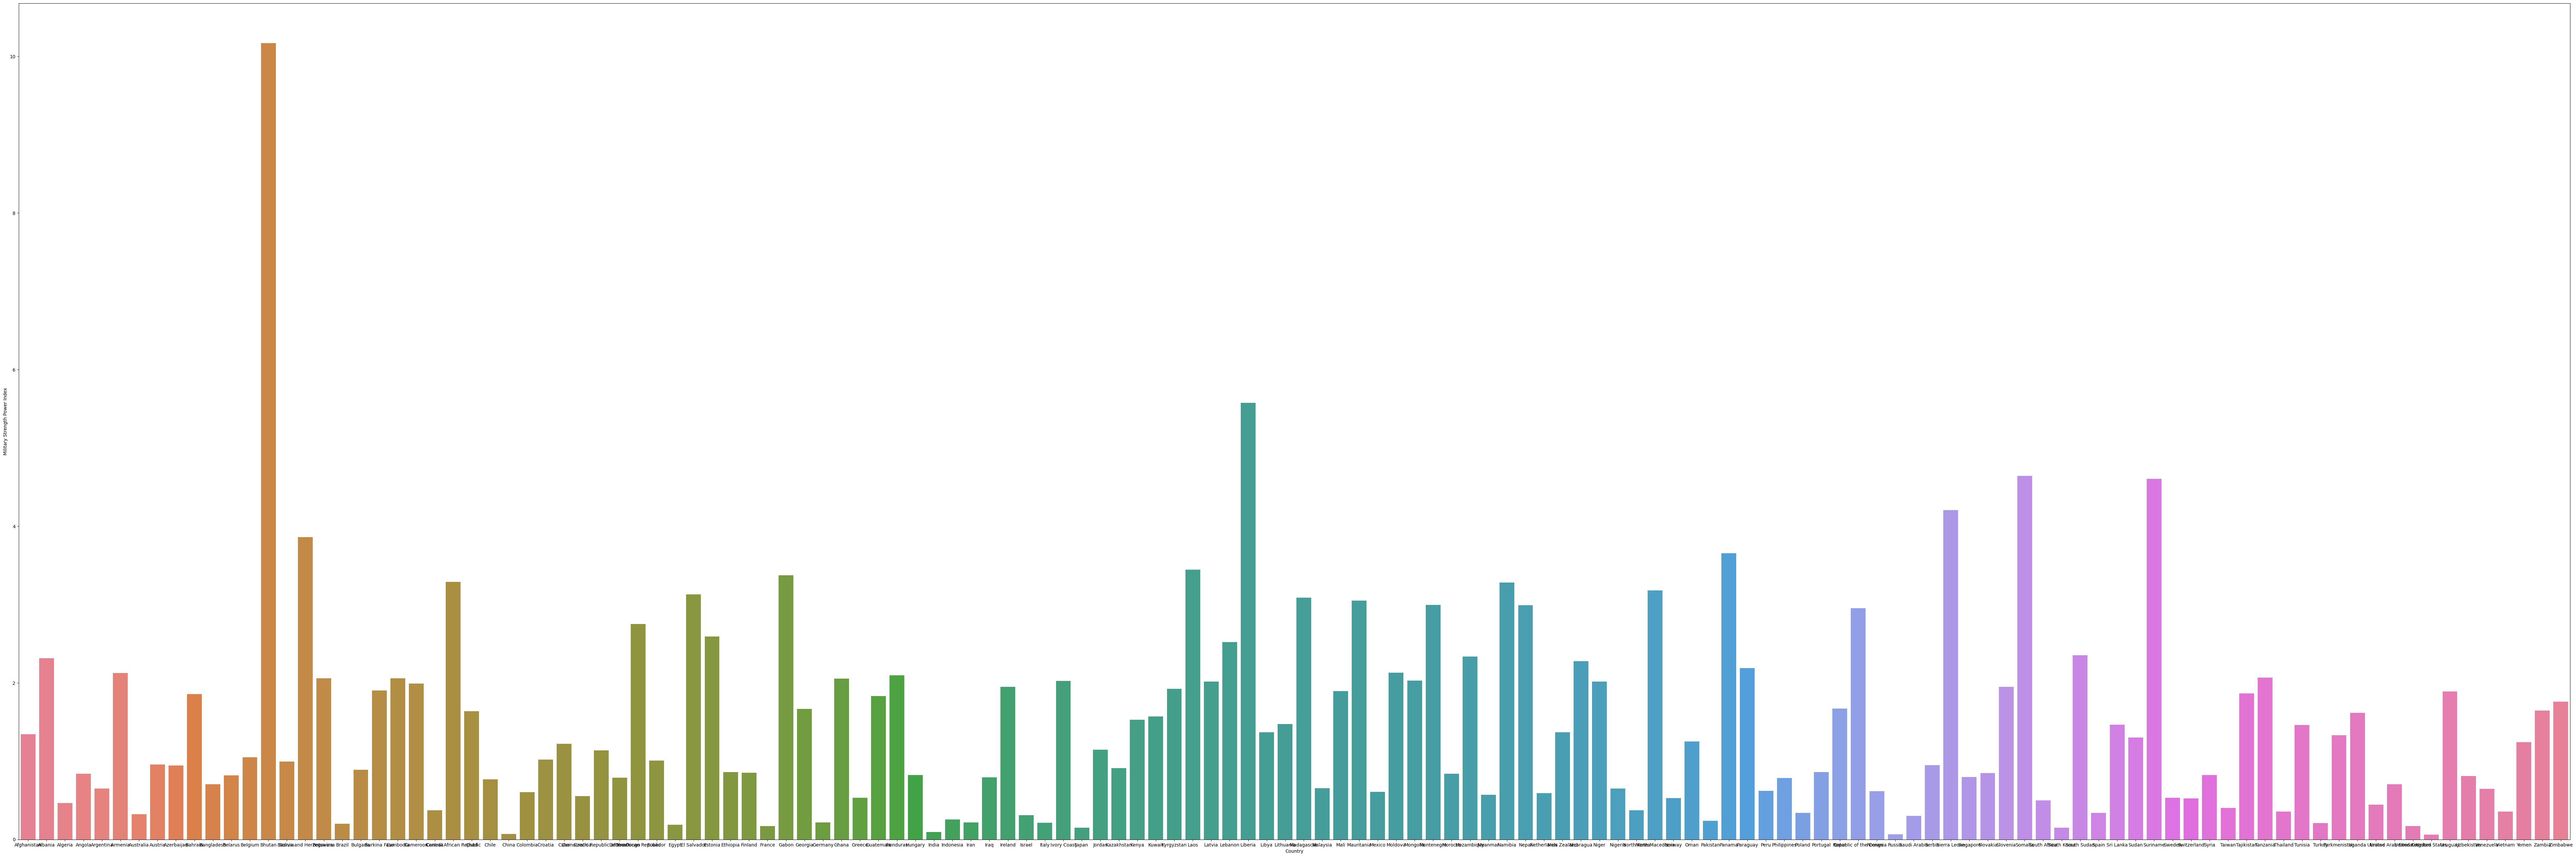

In [19]:
plt.figure(figsize=(100, 33))
sns.barplot(x='Country', y='Military Strength Power Index', data=df, hue='Country', legend=False);

In [20]:
df['Military Strength Power Index'].describe()

count                 138.00
mean                    1.46
std                     1.32
min                     0.06
25%                     0.57
50%                     1.03
75%                     2.02
max                    10.17
Name: Military Strength Power Index, dtype: float64

### Null values

In [21]:
nulls(df)

Navy Fleet Strengths value               14
Aircraft Carrier Fleet Strength value    23
Submarine Fleet Strength value           23
Destroyer Fleet Strength value           23
Frigate Fleet Strength value             23
Total Coastline Coverage value           29
Total Border Coverage value               9
dtype: int64

In [22]:
df['Military Strength Power Index'].isnull().sum()

0

We see that Military strength power index has no null values. This is the ultimate column that determines the military strength of the countries. A higher score here indicates that a country has a overall stronger military. As such, we can use this column to make an estimation of the null values on the other columns.

In [23]:
pd.concat([df[df.columns[df.isnull().any()]], df['Military Strength Power Index']], axis=1).corr(numeric_only=True)['Military Strength Power Index']

Navy Fleet Strengths value                             -0.38
Aircraft Carrier Fleet Strength value                  -0.20
Submarine Fleet Strength value                         -0.32
Destroyer Fleet Strength value                         -0.21
Frigate Fleet Strength value                           -0.42
Total Coastline Coverage value                         -0.20
Total Border Coverage value                            -0.28
Military Strength Power Index                           1.00
Name: Military Strength Power Index, dtype: float64

The code above shows the correlation between the 'Military Strength Power Index' column and the columns that have null values. We can use this correlation to make an estimation to fill the null values. We will take a subset of df where we will take the columns with the nan values and the 'Military Strength Power Index' column, and we will use linear regression to impute the nan values.

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [25]:
subset = pd.concat([df[df.columns[df.isnull().any()]], df['Military Strength Power Index']], axis=1)

In [26]:
subset.head()

,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,Total Coastline Coverage value,Total Border Coverage value,Military Strength Power Index
0,0.00,0.00,0.00,0.00,0.00,0.00,"5,987.00",1.34
1,38.00,0.00,0.00,0.00,0.00,362.00,691.00,2.31
2,201.00,0.00,6.00,0.00,5.00,998.00,"6,734.00",0.47
3,57.00,0.00,0.00,0.00,0.00,"1,600.00","5,369.00",0.84
4,49.00,0.00,2.00,4.00,0.00,"4,989.00","11,968.00",0.65


In [27]:
imputer = IterativeImputer(LinearRegression())
imputed = pd.DataFrame(imputer.fit_transform(subset), columns=subset.columns, index=subset.index)
imputed.head()

,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,Total Coastline Coverage value,Total Border Coverage value,Military Strength Power Index
0,0.00,0.00,0.00,0.00,0.00,0.00,"5,987.00",1.34
1,38.00,0.00,0.00,0.00,0.00,362.00,691.00,2.31
2,201.00,0.00,6.00,0.00,5.00,998.00,"6,734.00",0.47
3,57.00,0.00,0.00,0.00,0.00,"1,600.00","5,369.00",0.84
4,49.00,0.00,2.00,4.00,0.00,"4,989.00","11,968.00",0.65


In [28]:
for col in imputed.columns:
    df[col] = imputed[col] # Merge the subset and the original df

In [29]:
nulls(df)

Series([], dtype: int64)

And with that the null values have been taken care of.

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings

def see_elbow(x, k, model=KMeans()):
    vis = KElbowVisualizer(model, k=k)
    vis.fit(x)
    vis.show();

def run_clustering(x, clusters, model=KMeans):
    pred = model(clusters, random_state=42).fit_predict(x)
    score = silhouette_score(x, pred)
    print(f'Silhouette score of {str(model)} with {clusters} clusters: {score:.2f}')
    return pred

filterwarnings('ignore')
ss = StandardScaler()

In [31]:
features = df.drop('Country', axis=1)
scaled = ss.fit_transform(features)

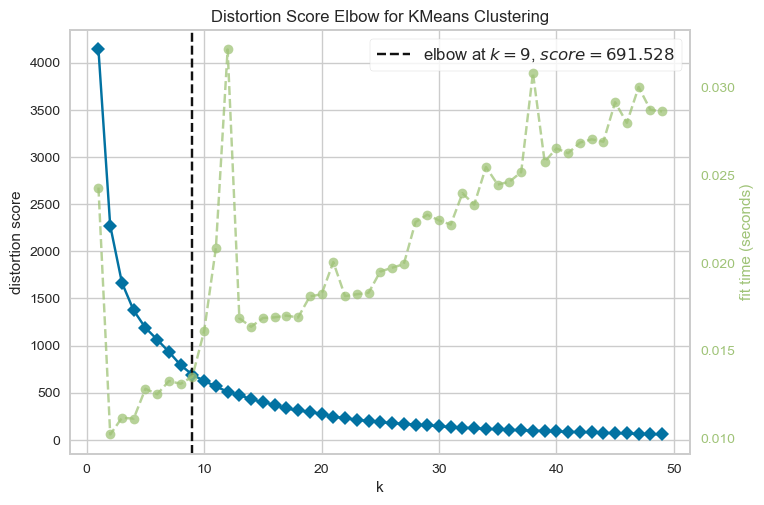

In [32]:
see_elbow(scaled, (1, 50))

In [33]:
clusters = run_clustering(scaled, 9);

Silhouette score of <class 'sklearn.cluster._kmeans.KMeans'> with 9 clusters: 0.42


This seems good enough.

In [34]:
result = pd.DataFrame({
    'Country': df['Country'],
    'Cluster': pd.Series(clusters)
})

### Visualizing the result

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
cluster_counts = result['Cluster'].value_counts()

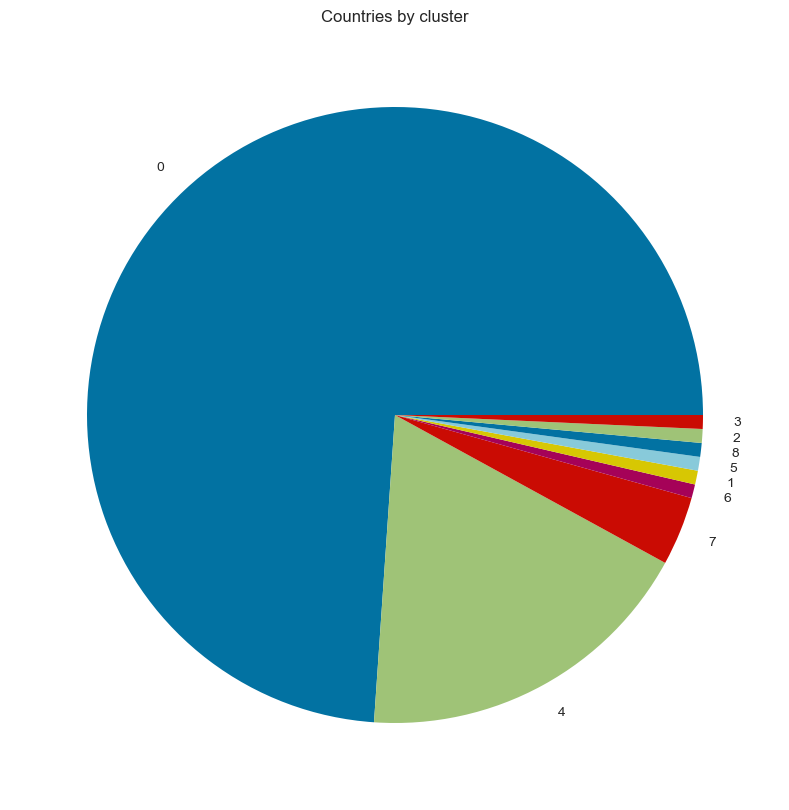

In [37]:
plt.figure(figsize=(15, 10))
plt.pie(cluster_counts, labels=cluster_counts.index);
plt.title("Countries by cluster");

The majority of the countries are in cluster 0.

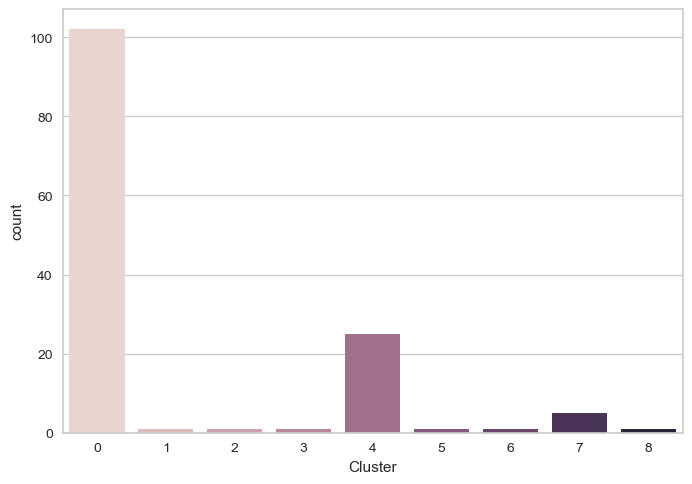

In [38]:
sns.countplot(x=result['Cluster'], hue=result["Cluster"], legend=False);

## Conclusion

In this project I use clustering methods on the world military powers data. I first started off by cleaning up the data. I removed the duplicated country name columns and left one column for the name of the country in each row. The data had categorical entries for each column, but they were numerical in nature so I converted them into numerical column. Then came the process of imputing the null values. I used sklearn's IterativeImputer and LinearRegression to estimate these null values and fill them. Once everything was good, I used KMeans to cluster this data. First of all I used StandardScaler to scale the numerical columns. I then used elbow method to determine the amount of clusters. For this, I used KElbowVisualizer from yellowbrick.cluster. I tried from 1 through 50 clusters, and saw that the elbow point was at k = 9. After that, I ran KMeans on the scaled data with 9 clusters and got a silhouette score of 0.42. I believe with further optimizations this score could be higher. I created a result data frame consisting of two columns: the name of the country and the cluster it belongs to. I then visualized this data using a piec hart and a bar chart.